In [1]:
import numpy as np
import pandas as pd

import scipy
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('churn_analysis.csv')

In [3]:
all_data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [7]:
all_data.shape

(3333, 23)

In [4]:
control_data = all_data[all_data.treatment == 1]

In [6]:
control_data.shape

(1097, 23)

In [14]:
subtable = pd.crosstab(control_data['state'], control_data['churn'])

In [60]:
pd.concat([subtable.iloc[0:1], subtable.iloc[5:6]]).values

array([[19,  1],
       [17,  5]], dtype=int64)

In [87]:
count = 0
length = len(subtable)
p_count = 0
p_mean = 0

for i in range(length):
    for j in range(length):
        if i < j:
            count += 1
            chi2, p, dof, expected = scipy.stats.chi2_contingency(pd.concat([subtable.iloc[i:i+1], subtable.iloc[j:j+1]]), correction=False)
            p_mean += p
            if p < 0.05:
                p_count += 1
print(p_mean / count)

0.5018273798739152


In [88]:
p_count

34

In [89]:
count = 0
length = len(subtable)
p_count = 0
p_mean = 0

for i in range(length):
    for j in range(length):
        if i < j:
            count += 1
            chi2, p, dof, expected = scipy.stats.chi2_contingency(pd.concat([subtable.iloc[i:i+1], subtable.iloc[j:j+1]]), correction=True)
            p_mean += p
            if p < 0.05:
                p_count += 1
print(p_mean / count)

0.6640566382051045


In [90]:
p_count

0

In [91]:
count = 0
length = len(subtable)
p_count = 0
p_mean = 0

for i in range(length):
    for j in range(length):
        if i < j:
            count += 1
            oddsratio, p = scipy.stats.fisher_exact(pd.concat([subtable.iloc[i:i+1], subtable.iloc[j:j+1]]))
            p_mean += p
            if p < 0.05:
                p_count += 1
                
print(p_mean / count)

0.6483383060020687


In [92]:
p_count

10

In [68]:
scipy.stats.pearsonr(control_data['day_calls'], control_data['mes_estim'])

(-0.03781952334681003, 0.21070115445102253)

In [69]:
scipy.stats.spearmanr(control_data['day_calls'], control_data['mes_estim'])

SpearmanrResult(correlation=0.04992725305465314, pvalue=0.09837450232062969)

In [93]:
scipy.stats.shapiro(control_data['day_calls'])

(0.9976719617843628, 0.1221320852637291)

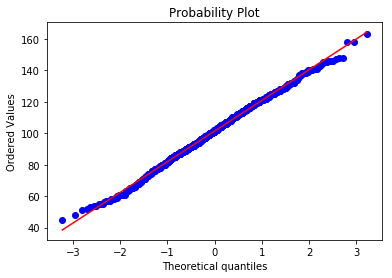

In [94]:
scipy.stats.probplot(control_data['day_calls'], plot=plt)
plt.show()

In [95]:
scipy.stats.shapiro(control_data['mes_estim'])

(0.9984104037284851, 0.4145157039165497)

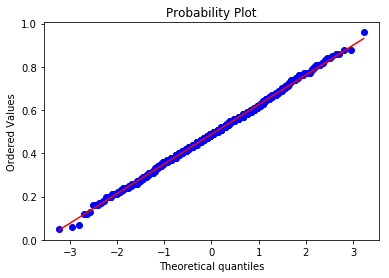

In [96]:
scipy.stats.probplot(control_data['mes_estim'], plot=plt)
plt.show()

In [76]:
def v_cramer(chi, n, shape):
    return np.sqrt(chi/n/(min(shape[0], shape[1])-1))

In [79]:
result_chi2 = scipy.stats.chi2_contingency(subtable)

print('v-cramer:', v_cramer(result_chi2[0], len(control_data), subtable.shape))

v-cramer: 0.2003932150203332


In [80]:
tr_0 = all_data[all_data.treatment == 0]

In [81]:
tr_2 = all_data[all_data.treatment == 2]

In [82]:
scipy.stats.mannwhitneyu(control_data['churn'], tr_0['churn'])

MannwhitneyuResult(statistic=609983.0, pvalue=0.11422789726970456)

In [98]:
scipy.stats.mannwhitneyu(control_data['churn'], tr_2['churn'], alternative='less')

MannwhitneyuResult(statistic=628572.5, pvalue=0.9953186590826187)

In [84]:
scipy.stats.mannwhitneyu(tr_0['churn'], tr_2['churn'])

MannwhitneyuResult(statistic=612029.0, pvalue=0.0782667531519737)